In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from simple_convnet import SimpleConvNet
%matplotlib inline

from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [3]:
x_img = x_test[0]
x_label = t_test[0]

<function matplotlib.pyplot.show(*args, **kw)>

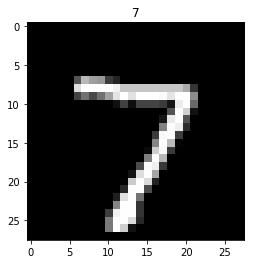

In [4]:
plt.imshow(x_img, 'gray')
plt.title(x_label)
plt.show

In [5]:
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 3, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

In [6]:
network.load_params("params_20.pkl")

In [7]:
x_img = x_img.reshape(-1, 1, 28, 28)
pred = network.predict(x_img)
pred_probability = softmax(pred)
pred_probability

array([[3.36049504e-08, 1.40437832e-07, 1.11512805e-05, 8.01524005e-07,
        6.37050857e-11, 8.75920846e-09, 8.89795146e-12, 9.99987250e-01,
        5.91371920e-07, 2.28143177e-08]])

In [8]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([7])

In [9]:
x_base = x_img.copy()

In [10]:
predict_result = network.predict(x_base)
predict_result

array([[-1.50942145, -0.07932992,  4.29521478,  1.66242008, -7.77758572,
        -2.85398929, -9.74602904, 15.69915825,  1.35835029, -1.89670653]])

In [12]:
predict_label = np.argmax(predict_result)
predict_label

7

In [30]:
params = network.params
print(params['W1'].shape)
print(params['b1'].shape)
print(params['W2'].shape)
print(params['b2'].shape)
print(params['W3'].shape)
print(params['b3'].shape)

(30, 1, 3, 3)
(30,)
(5070, 100)
(100,)
(100, 10)
(10,)


In [43]:
# x_base.shape
grad = network.gradient(x_base, np.array([7]))
grad

{'W1': array([[[[-4.12220796e-05, -5.08890446e-05, -4.08986655e-05],
          [-2.64433146e-05, -4.29435420e-05, -4.83996424e-05],
          [-1.89387386e-05, -2.85132342e-05, -3.03675815e-05]]],
 
 
        [[[-1.60009504e-06,  4.85072341e-05,  7.91339553e-05],
          [ 2.19879561e-05,  6.07189121e-05,  8.58562443e-05],
          [ 3.57815489e-05,  7.45409218e-05,  6.40579007e-05]]],
 
 
        [[[ 6.43018410e-05,  3.93936315e-05,  2.16191612e-06],
          [ 4.34226223e-05,  1.72065446e-05, -2.03393162e-05],
          [ 1.69282498e-05, -1.26448270e-05, -2.78083211e-05]]],
 
 
        [[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
 
 
        [[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
 
 
        [[[ 0.00000

In [44]:
def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

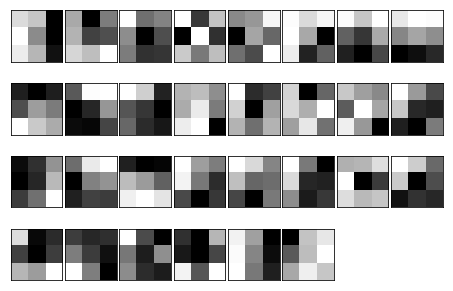

In [45]:
filter_show(network.params['W1'])

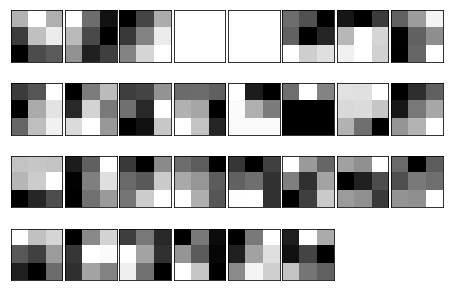

In [46]:
filter_show(grad['W1'])

In [47]:
n_p = network.params['W1'].copy()
n_p

array([[[[-3.09096975e-02, -2.29956258e-02,  5.18817793e-02],
         [-4.46903132e-02, -4.46365123e-04,  5.25452487e-02],
         [-3.73429861e-02, -1.69096828e-02,  4.55896847e-02]]],


       [[[ 8.51344547e-03,  5.52587720e-02,  2.08517431e-02],
         [ 5.59513106e-03,  3.72737940e-02,  3.33727395e-02],
         [-3.93587527e-03,  2.85572002e-03, -1.52297160e-02]]],


       [[[-1.47995902e-02,  4.34172098e-02,  3.51263121e-02],
         [ 3.12389447e-02,  8.80192316e-02,  5.65509102e-02],
         [ 3.81915900e-02,  6.78974393e-02,  6.65015457e-02]]],


       [[[-1.35788517e-02,  4.13093064e-03, -8.24882506e-03],
         [ 9.17592941e-03, -1.35677153e-02,  4.77803540e-03],
         [-8.81112741e-03, -1.68076999e-03, -7.71656803e-03]]],


       [[[-5.73961530e-03, -6.72458863e-03, -1.37396057e-02],
         [ 4.40251686e-03, -7.73931281e-03, -3.18109498e-03],
         [-3.79306638e-03, -1.12590465e-03, -1.44314096e-02]]],


       [[[-2.09319778e-02, -1.47460669e-02, -1.964

In [48]:
g_p = grad['W1'].copy()

In [49]:
e_p = n_p - 0.01 * g_p

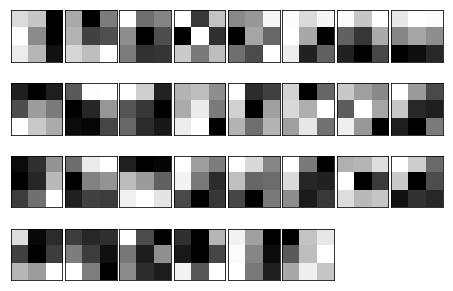

In [50]:
filter_show(e_p)

In [51]:
n_p == e_p

array([[[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]],


       [[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]],


       [[[ True, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


       [[[False, False, False],
         [False, False, False],
         [False, False, False]]],


